In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np

In [2]:
%matplotlib inline

## Plot types

In [3]:
sns.__version__

'0.5.1'

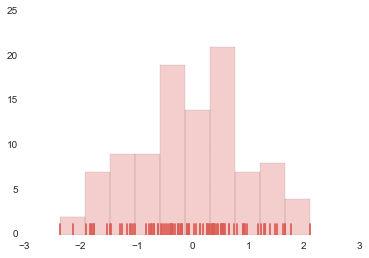

In [4]:
t = np.random.randn(100)
sns.set_palette('hls', 1)
plt.hist(t, alpha=0.3);
sns.rugplot(t);

In [5]:
from scipy import stats

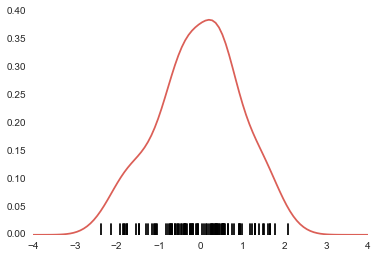

In [6]:
kde = stats.gaussian_kde(t)
x = np.linspace(-4, 4, 100)
y = kde(x)
plt.plot(x, y);
sns.rugplot(t, color='black');

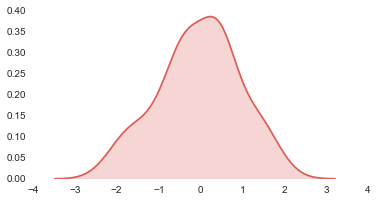

In [7]:
plt.figure(figsize=(6, 3));
f, a = plt.subplots(nrows=1, ncols=1, figsize=(6, 3));
sns.kdeplot(t, shade=True, ax=a);

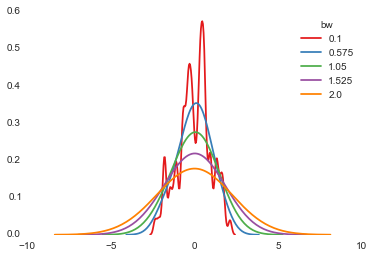

In [8]:
with sns.color_palette('Set1'):
    bws = np.linspace(0.1, 2, 5)
    cols = sns.color_palette('hls', len(bws))
    for bw, col in zip(bws, cols):
        sns.kdeplot(t, bw=bw, label=bw);
    plt.legend(title='bw');

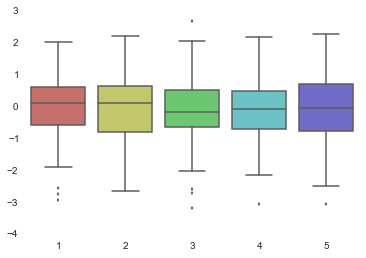

In [9]:
t = np.random.randn(100, 5)
sns.set_palette('hls')
sns.boxplot(t);

In [11]:
sns.boxplot?

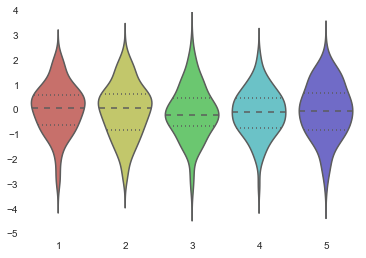

In [10]:
sns.violinplot(t);

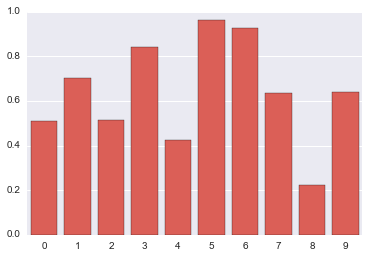

In [17]:
t = pd.DataFrame(dict(x=x, y=y))
x = np.arange(10)
y = np.random.rand(10)
sns.set_style('darkgrid')
sns.barplot(x, y);

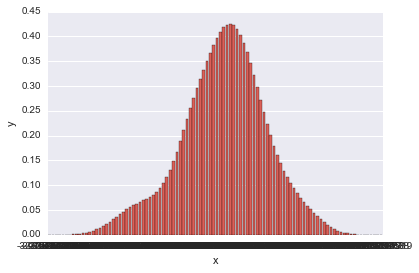

In [18]:
sns.barplot('x', 'y', data=t)

In [12]:
t = sns.load_dataset('exercise')

In [13]:
t.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


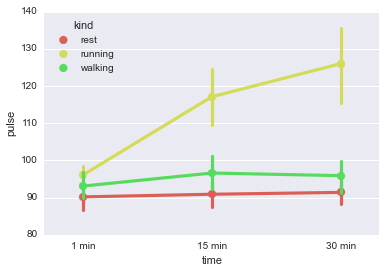

In [20]:
sns.pointplot('time', 'pulse', data=t, hue='kind');

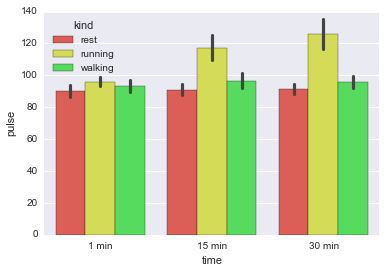

In [21]:
sns.barplot('time', 'pulse', data=t, hue='kind');

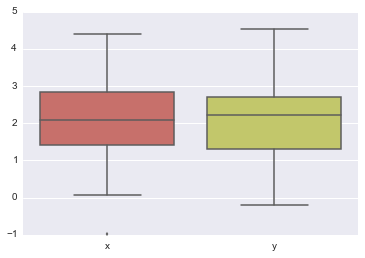

In [22]:
t = pd.DataFrame(dict(x=np.random.normal(loc=2, size=100), y=np.random.normal(loc=2, size=100)));
sns.boxplot(t);

In [23]:
t = sns.load_dataset('titanic')

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


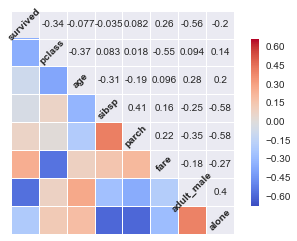

In [24]:
sns.corrplot(t)

In [25]:
t = sns.load_dataset('flights')

In [26]:
t.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
tt = t.pivot(index='year', columns='month', values='passengers')

In [28]:
tt.head()

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


[(0.69227222075649331, 0.092272204803485525, 0.16770473370949396),
 (0.83921569585800171, 0.37647059559822083, 0.30196079611778259),
 (0.95455594273174504, 0.64175319262579378, 0.5057285948126925),
 (0.99215686321258534, 0.85882353782653809, 0.78039216995239269),
 (0.96570549992954036, 0.96724336988785686, 0.96808919836493101),
 (0.81960785388946544, 0.89803922176361084, 0.94117647409439076),
 (0.56647445816619735, 0.76870435826918648, 0.8685121185639324),
 (0.26274511218070995, 0.57647061347961415, 0.76470589637756337),
 (0.12725875369620088, 0.3958477567808299, 0.66874281039424976)]

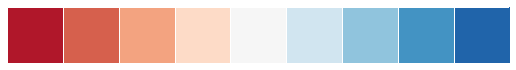

In [29]:
sns.choose_colorbrewer_palette('divergent')

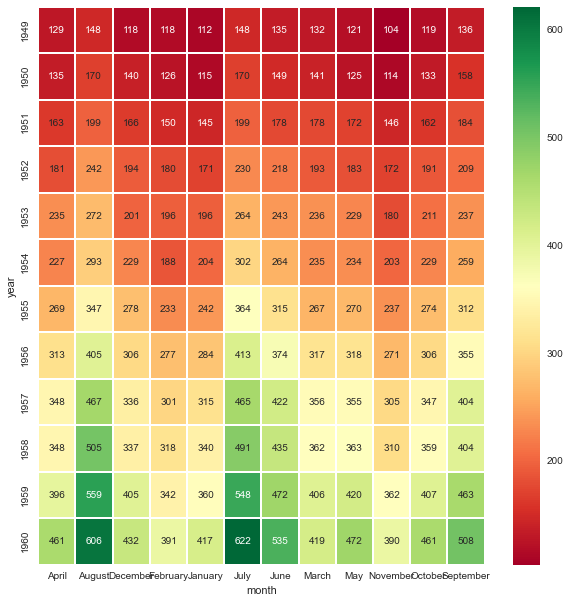

In [30]:
plt.figure(figsize=(10, 10));
sns.heatmap(tt, annot=True, fmt='d', cmap='RdYlGn')

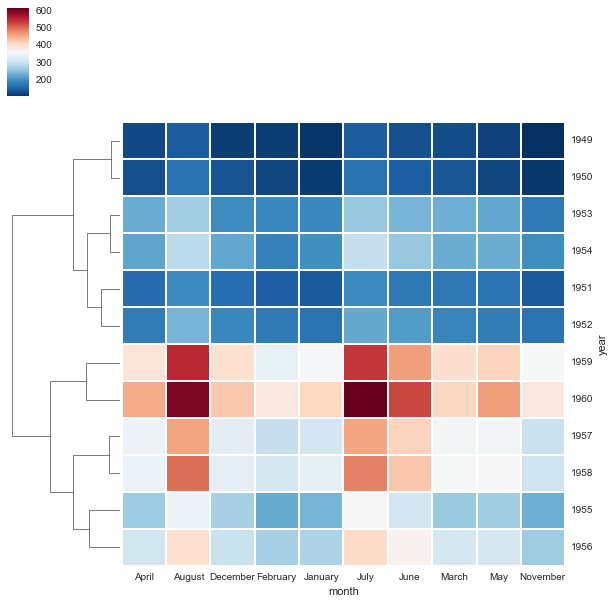

In [31]:
sns.clustermap(tt.iloc[:, :10], cmap='RdBu_r', col_cluster=False);

## Time series

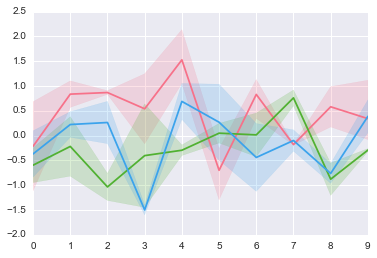

In [32]:
np.random.seed(0)
def time_series():
    return np.vstack([np.random.randn(10) for i in range(3)])
t = [time_series() for i in range(3)]
t = np.dstack(t)
sns.tsplot(t, color='husl')

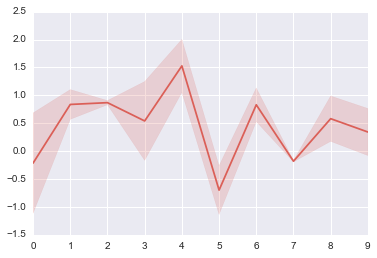

In [33]:
sns.tsplot(t[:, :, 0])

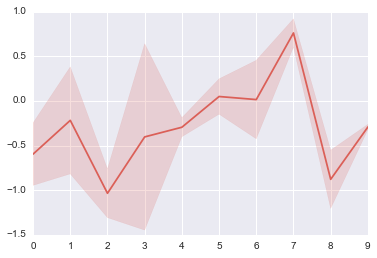

In [34]:
sns.tsplot(t[:, :, 1])

In [35]:
def gamma_pdf(x, shape, coef, obs_err_sd=.1, tp_err_sd=.001):
    y = stats.gamma(shape).pdf(x) * coef
    y += np.random.normal(0, obs_err_sd, 1)
    y += np.random.normal(0, tp_err_sd, len(x))
    return y

gammas = []
n_units = 20
params = [(5, 1), (8, -.5)]
x = np.linspace(0, 15, 31)
for s in range(n_units):
    for p, (shape, coef) in enumerate(params):
        y = gamma_pdf(x, shape, coef)
        gammas.append(pd.DataFrame(dict(condition=[["pos", "neg"][p]] * len(x),
                                        subj=["subj%d" % s] * len(x),
                                        time=x * 2,
                                        BOLD=y), dtype=np.float))
gammas = pd.concat(gammas)

In [36]:
gammas.head()

,BOLD,condition,subj,time
0,-0.039095,pos,subj0,0
1,-0.038530,pos,subj0,1
2,-0.024013,pos,subj0,2
3,0.007105,pos,subj0,3
4,0.050612,pos,subj0,4


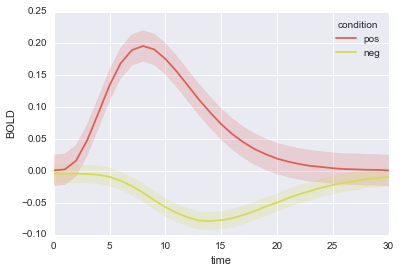

In [37]:
sns.tsplot(gammas, value='BOLD', time='time', unit='subj', condition='condition')

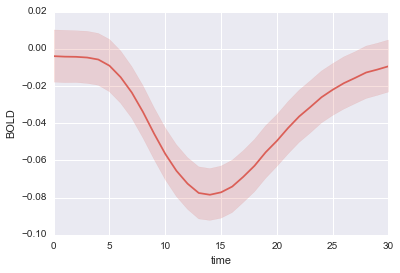

In [38]:
sns.tsplot(gammas[gammas.condition == 'neg'], value='BOLD', time='time', unit='subj')

## Color palettes

In [39]:
print(sns.color_palette('hls', 1))
print(sns.color_palette())

[(0.86, 0.37119999999999997, 0.33999999999999997)]
[(0.86, 0.37119999999999997, 0.33999999999999997), (0.82879999999999987, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.37119999999999997), (0.33999999999999997, 0.82879999999999987, 0.86), (0.37119999999999997, 0.33999999999999997, 0.86), (0.86, 0.33999999999999997, 0.82879999999999987)]


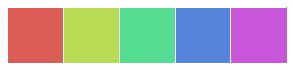

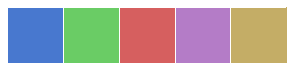

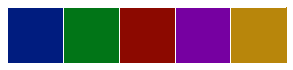

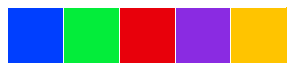

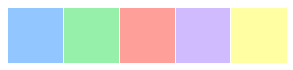

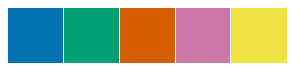

In [40]:
cols = ['hls', 'muted', 'dark', 'bright', 'pastel', 'colorblind']
for col in cols:
    sns.palplot(sns.color_palette(col, 5))

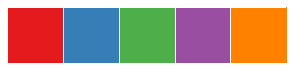

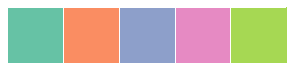

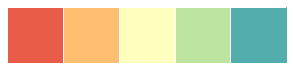

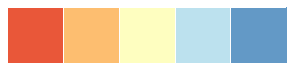

In [41]:
cols = ['Set1', 'Set2', 'Spectral', 'RdYlBu']
for col in cols:
    sns.palplot(sns.color_palette(col, 5))

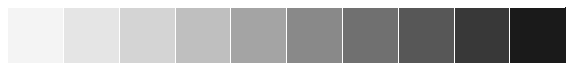

In [42]:
sns.choose_colorbrewer_palette('sequential');

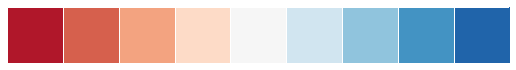

In [43]:
sns.choose_colorbrewer_palette('divergent');

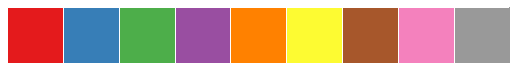

In [44]:
sns.choose_colorbrewer_palette('qualitative');

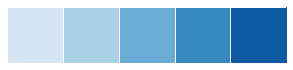

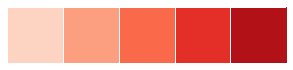

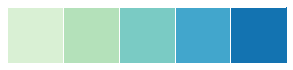

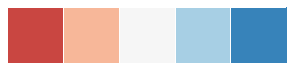

In [45]:
cols = ['Blues', 'Reds', 'GnBu', 'RdBu']
for col in cols:
    sns.palplot(sns.color_palette(col, 5))

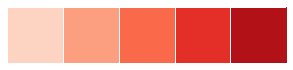

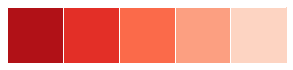

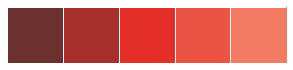

In [46]:
cols = ['Reds', 'Reds_r', 'Reds_d']
for col in cols:
    sns.palplot(sns.color_palette(col, 5))

## Styles

In [47]:
def boxplot():
    t = np.random.rand(100, 10)
    sns.boxplot(t)

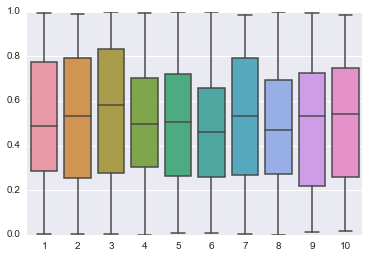

In [48]:
sns.set_style('darkgrid')
boxplot()

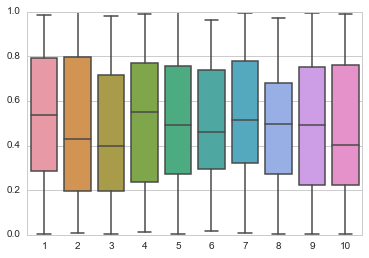

In [49]:
sns.set_style('whitegrid')
boxplot()

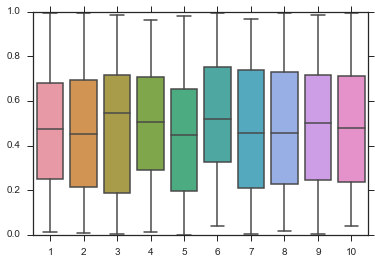

In [50]:
sns.set_style('ticks')
boxplot()

In [51]:
sns.set_style('darkgrid')

## Context

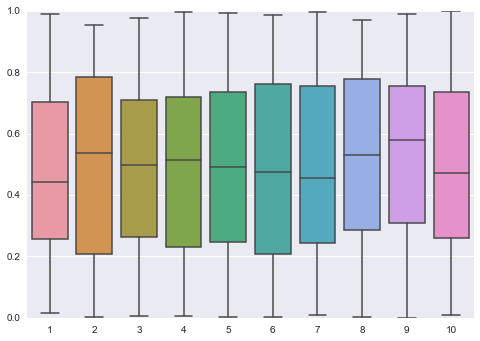

In [52]:
sns.set_context('notebook')
boxplot()

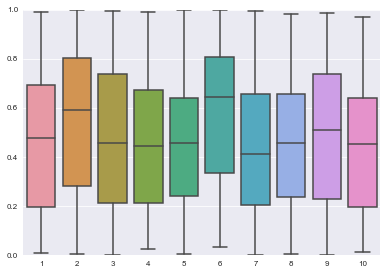

In [53]:
sns.set_context('paper')
boxplot()

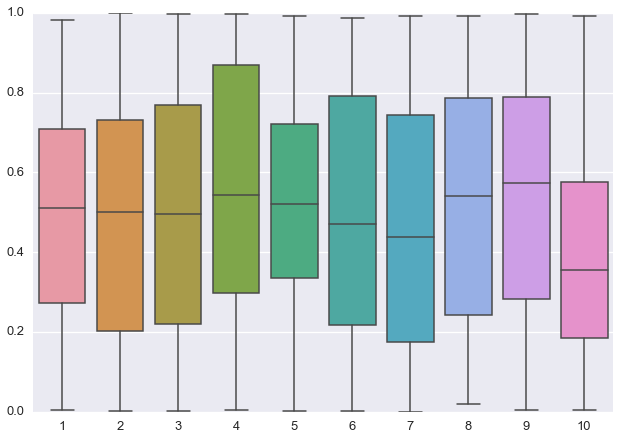

In [54]:
sns.set_context('talk')
boxplot()

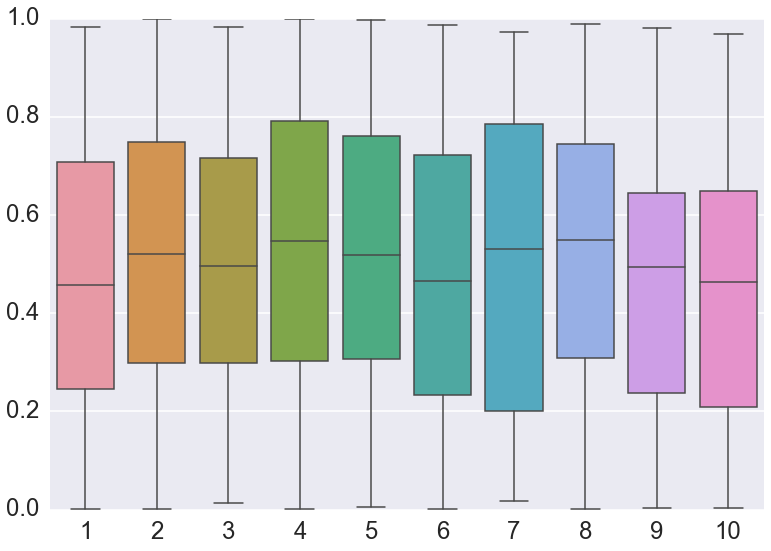

In [55]:
sns.set_context('poster', font_scale=1.5)
boxplot()

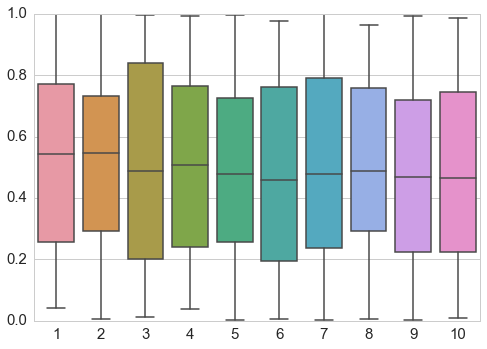

In [56]:
sns.set(context='notebook', style='whitegrid', palette='muted', font_scale=1.5)
boxplot()

In [57]:
d = np.random.multivariate_normal(mean=[5.0, 4.0], cov=np.eye(2), size=100)

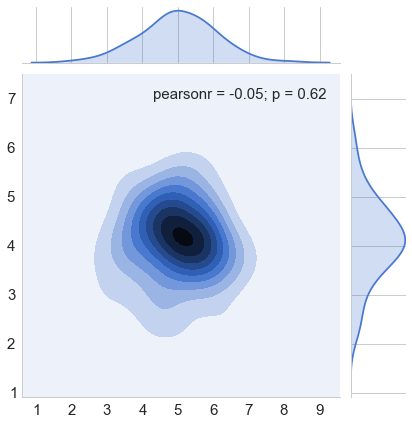

In [58]:
sns.jointplot(d[:, 0], d[:, 1], kind='kde')

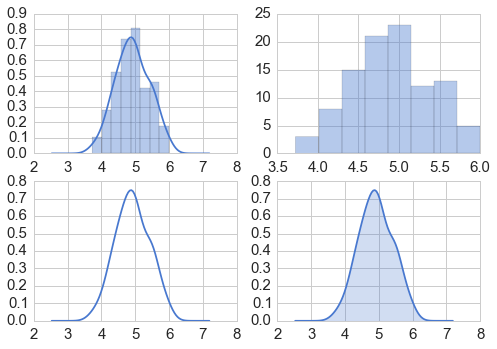

In [59]:
d = np.random.normal(5, 0.5, 100)
f, a = plt.subplots(2, 2)
sns.distplot(d, ax=a[0, 0])
sns.distplot(d, kde=False, ax=a[0, 1])
sns.distplot(d, hist=False, ax=a[1, 0])
sns.distplot(d, hist=False, kde_kws={'shade':True}, ax=a[1, 1])

## Facetting

In [60]:
t = sns.load_dataset('titanic')

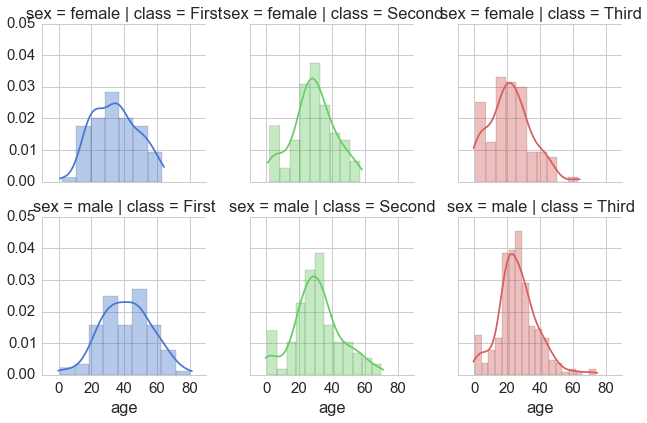

In [61]:
g = sns.FacetGrid(t, col='class', row='sex', hue='class');
g.map(sns.distplot, 'age');

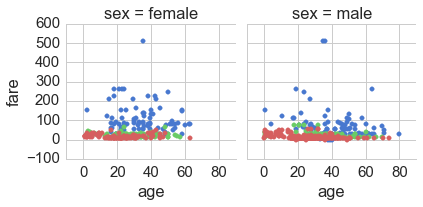

In [62]:
g = sns.FacetGrid(t, col='sex', col_wrap=2, hue='class')
g.map(plt.scatter, 'age', 'fare')

## Regression

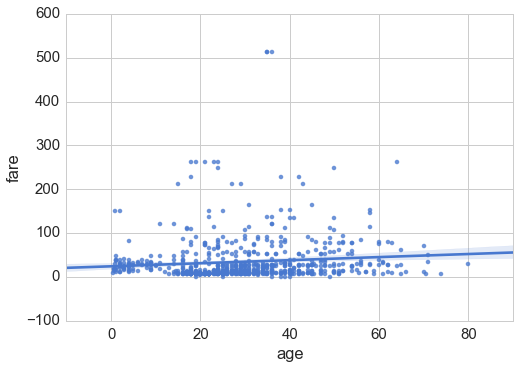

In [63]:
sns.regplot('age', 'fare', data=t);

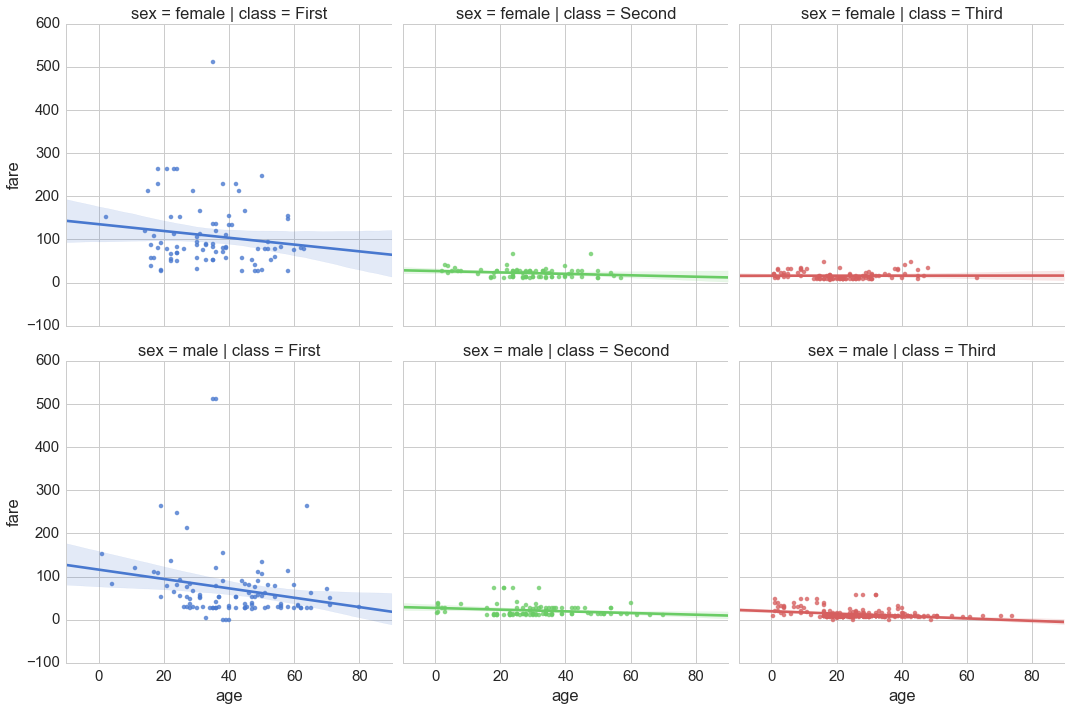

In [64]:
sns.lmplot('age', 'fare', data=t, row='sex', col='class', hue='class');

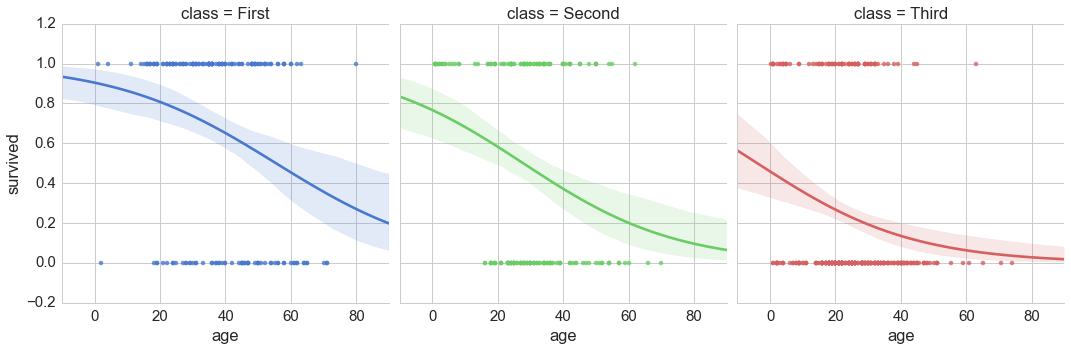

In [67]:
sns.lmplot('age', 'survived', t, col='class', hue='class', logistic=True)

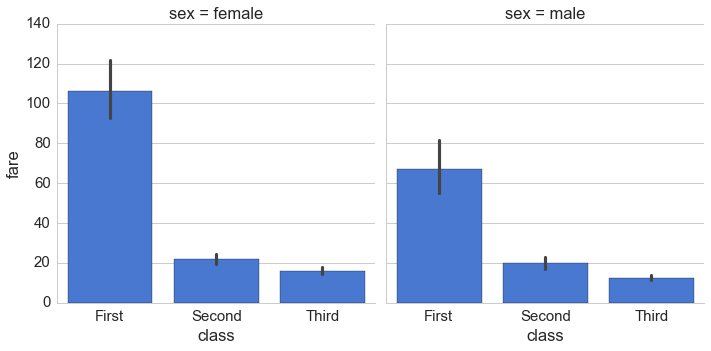

In [68]:
sns.factorplot('class', 'fare', data=t, col='sex')

In [69]:
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


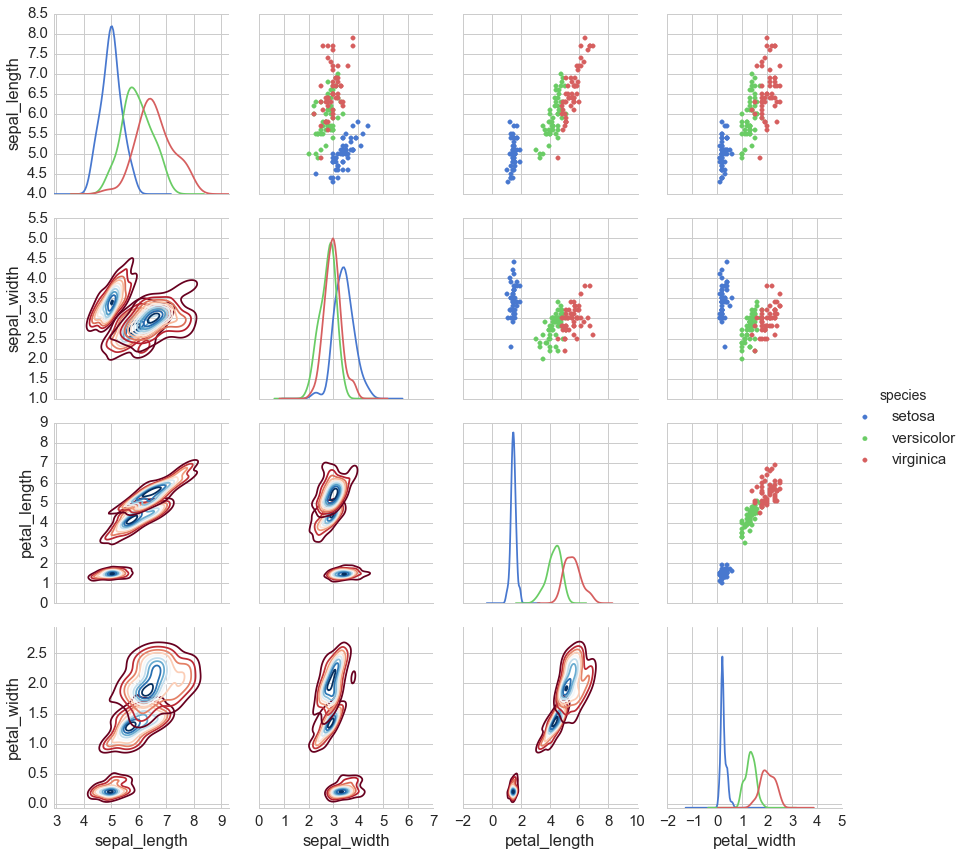

In [70]:
t = sns.load_dataset('iris')
p = sns.PairGrid(t, diag_sharey=False, hue='species');
p.map_diag(sns.kdeplot)
p.map_lower(sns.kdeplot, cmap='RdBu')
p.map_upper(plt.scatter)
p.add_legend()

In [71]:
t = sns.load_dataset('titanic');
t = t.iloc[np.random.choice(t.index, 100), :]

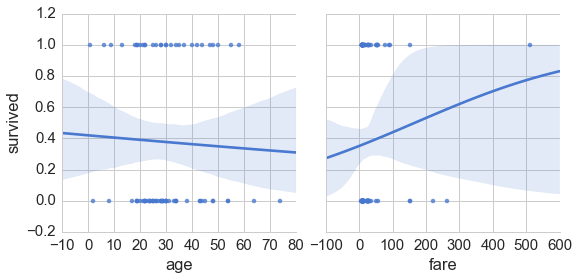

In [73]:
p = sns.PairGrid(t, y_vars='survived', x_vars=['age', 'fare'], size=4);
p.map(sns.regplot, logistic=True);

In [74]:
t = sns.load_dataset('tips')

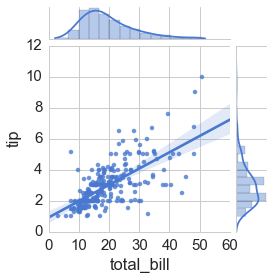

In [75]:
g = sns.JointGrid('total_bill', 'tip', data=t, size=4)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.distplot)